In [13]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1011': 1024}


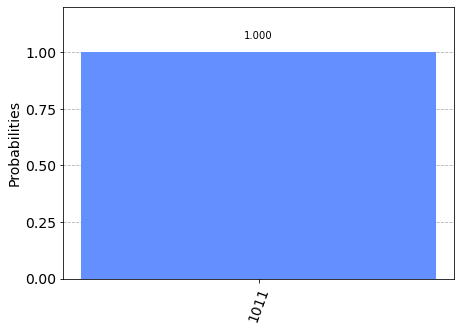

In [14]:
# https://arxiv.org/pdf/1903.07605.pdf
        
def iqft(qci, q, n):
    for i in range(n):
        for j in range(i):
            qci.cu1(-pi/float(2**(i-j)),q[j], q[i])
        qci.h(q[i])

n = 4
phase = 11.0*pi/8.0
qr = QuantumRegister(n, 'qr')
c = ClassicalRegister(n)
qc = QuantumCircuit(qr, c)

qc.h(qr)

qc.u1(1*phase, qr[3])
qc.u1(2*phase, qr[2])
qc.u1(4*phase, qr[1])
qc.u1(8*phase, qr[0])

iqft(qc, qr, n)

qc.measure(qr, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [15]:
theta=2*pi*(1/2+1/8+1/16)
print(theta)

4.319689898685965


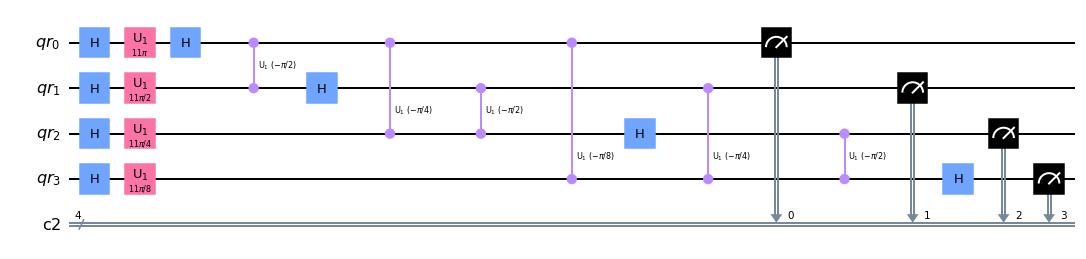

In [16]:
qc.draw(output='mpl')

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [12]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [8]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmqx2', backend_version='1.2.0', date=datetime.datetime(2019, 8, 3, 14, 14, 2, tzinfo=tzutc()), execution_id='ea8a37be-b5f8-11e9-9b4a-9c5c8e96e1ef', header=Obj(backend_name='ibmqx2', backend_version='1.0.0'), job_id='5d459678f3a4d9001121615a', qobj_id='b7877ce5-81d4-4e70-a305-73e19f5b7199', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=52, 0x1=55, 0x2=34, 0x3=41, 0x4=47, 0x5=139, 0x6=59, 0x7=54, 0x8=44, 0x9=57, 0xA=40, 0xB=59, 0xC=64, 0xD=145, 0xE=67, 0xF=67)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1], ['c0', 2], ['c0', 3]], creg_sizes=[['c0', 4]], memory_slots=4, n_qubits=5, name='circuit0', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, shots=1024, success=True)], status='Successful completion', success=True)


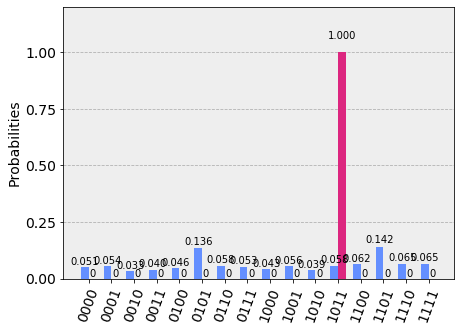

In [9]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [6]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
creg c0[4];
h qr[0];
h qr[1];
h qr[2];
h qr[3];
u1(11*pi/8) qr[3];
u1(11*pi/4) qr[2];
u1(11*pi/2) qr[1];
u1(11*pi) qr[0];
h qr[0];
cu1(-pi/2) qr[0],qr[1];
h qr[1];
cu1(-pi/4) qr[0],qr[2];
cu1(-pi/2) qr[1],qr[2];
h qr[2];
cu1(-pi/8) qr[0],qr[3];
cu1(-pi/4) qr[1],qr[3];
cu1(-pi/2) qr[2],qr[3];
h qr[3];
measure qr[0] -> c0[0];
measure qr[1] -> c0[1];
measure qr[2] -> c0[2];
measure qr[3] -> c0[3];

